Air Quality Prediction 


Table Of Contents 

1.) Load The Dataset 

2.) Data Cleaning 


3.) Extrat the Year from Date Column 

4.) Draw the Chats Using SeaBorn 


5.) Data preprocessing 

6.) Train and Test Data 


7.) Linear Regression

8.) Decisitiontree Regression

9.) RandomForest Regression 

10.) Gredient Boost Regression

11.) Best Model 

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("newdataset.csv")
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.shape

(29531, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Finding the Missing value of Each Column and Percentage 


In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

missing_values_table(df)

,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


Extract the Year In Date Column and Sort Based on Date 

In [7]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y')
df=df.sort_values(by='Date')
df.head(5)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN


Count of Each AQI Category

<Axes: xlabel='AQI_Bucket', ylabel='count'>

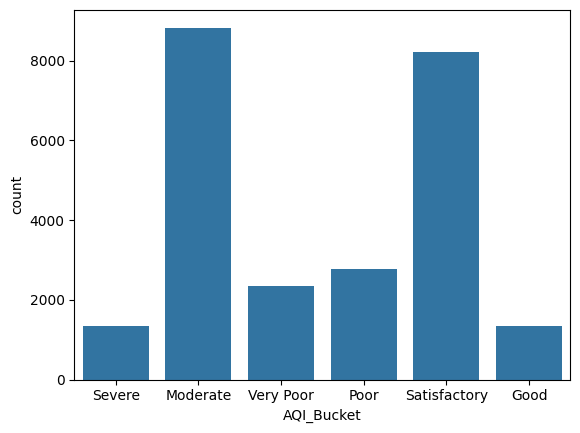

In [8]:
sns.countplot(x=df['AQI_Bucket'])

In [9]:
df = df.drop('AQI_Bucket',axis=1)
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN


Create a BOX PLOT for Each Pollutant and Analyzing.

<Axes: >

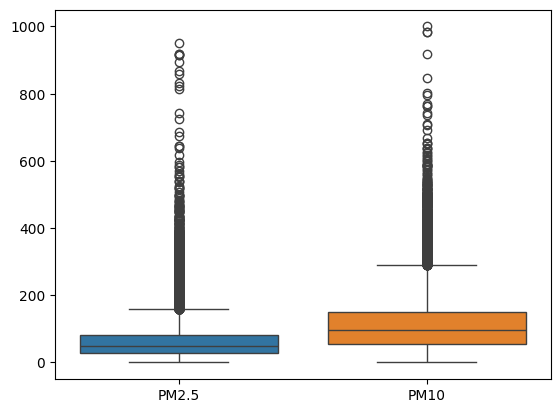

In [10]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

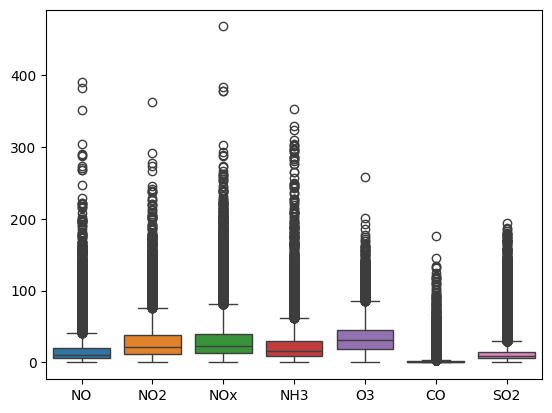

In [11]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3','O3','CO','SO2']])

DATA EDITING PROCEDURES

Procedures related to outlier data, missing data, data that has little relationship with our target column


In [12]:
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function. If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound, it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return df
df= replace_outliers_with_quartiles(df)

In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,24933.0,54.975923,0.04,28.82,48.57,80.59,158.21,32.781561
PM10,18391.0,104.818086,0.01,56.255,95.68,149.7425,289.95,60.357602
NO,25949.0,12.472491,0.02,5.63,9.89,19.95,41.43,8.941774
NO2,25946.0,25.482607,0.01,11.75,21.69,37.62,76.4,16.698364
NOx,25346.0,26.520383,0.0,12.82,23.52,40.125625,81.06,17.876378
NH3,19203.0,19.661227,0.01,8.58,15.85,30.02,62.16,13.838362
CO,27472.0,0.952485,0.0,0.51,0.89,1.45,2.86,0.61346
SO2,25677.0,10.304869,0.01,5.67,9.16,15.22,29.54,5.908036
O3,25509.0,32.836577,0.01,18.86,30.84,45.57,85.63,17.969539


<Axes: >

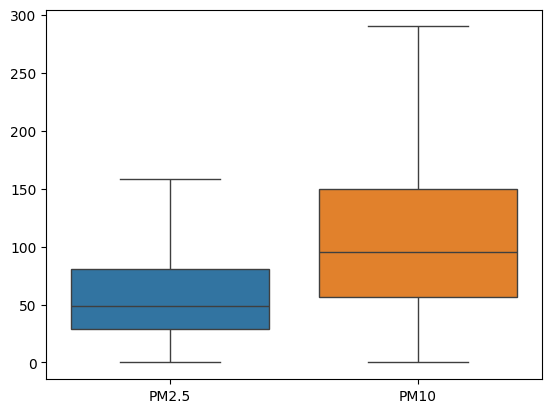

In [14]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

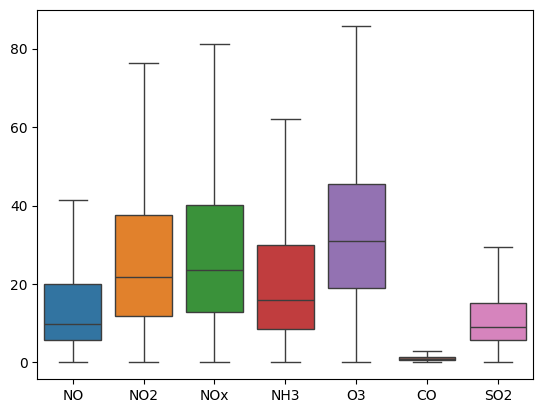

In [15]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3','O3','CO','SO2']])

In [16]:
df=df.drop(columns=['City'])

HeatMap For the Each Pollutant and AQI value

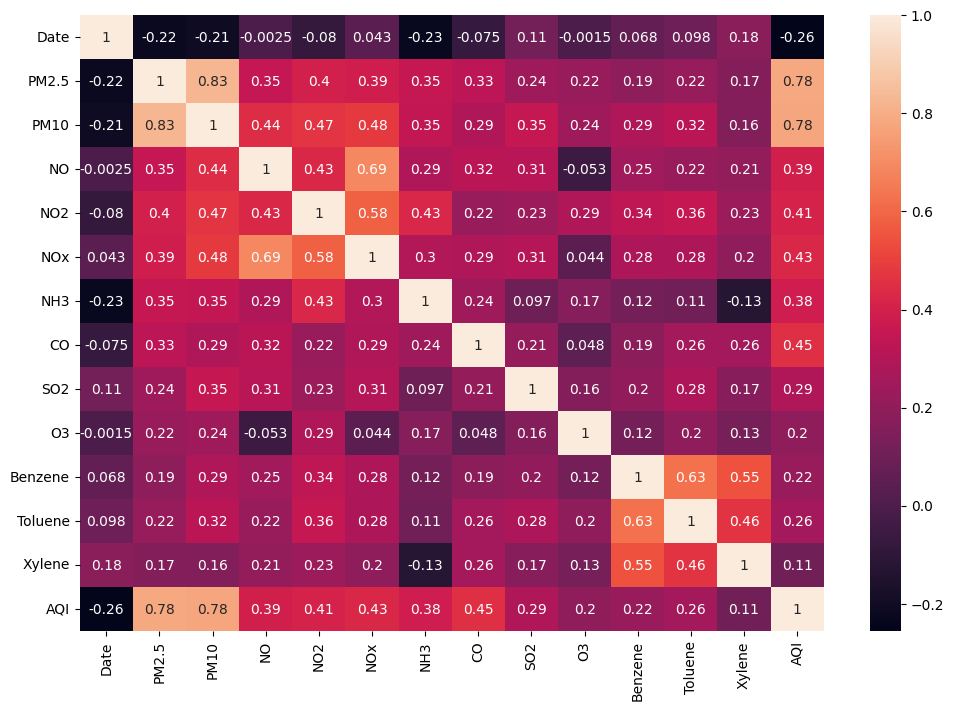

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
df=df.drop(columns=['Xylene', 'Benzene','O3'])


In [19]:
df.head(2)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
0,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,0.02,NaN
7834,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,NaN,NaN


In [20]:
cityname = pd.read_csv("newdataset.csv",usecols=['City'])

df['City'] = cityname
df.head(2)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,City
0,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,0.02,NaN,Ahmedabad
7834,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,NaN,NaN,Chennai


In [21]:
df_full= df[df['AQI'].notna()]

In [22]:
df_full['Year'] = df_full['Date'].dt.year

C:\Users\gtmad\AppData\Local\Temp\ipykernel_28804\3473639028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['Year'] = df_full['Date'].dt.year


In [23]:
df_full.head(2)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,City,Year
10229,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,Delhi,2015
10230,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,Delhi,2015


In [24]:
missing_values_table(df_full)

,Missing Values,% of Total Values
PM10,7086,28.5
NH3,6536,26.3
Toluene,5826,23.4
NOx,1857,7.5
PM2.5,678,2.7
SO2,605,2.4
CO,445,1.8
NO2,391,1.6
NO,387,1.6


AQI Per Year In Column Chart 

<Axes: title={'center': 'AQI Per Year'}, xlabel='Year', ylabel='AQI'>

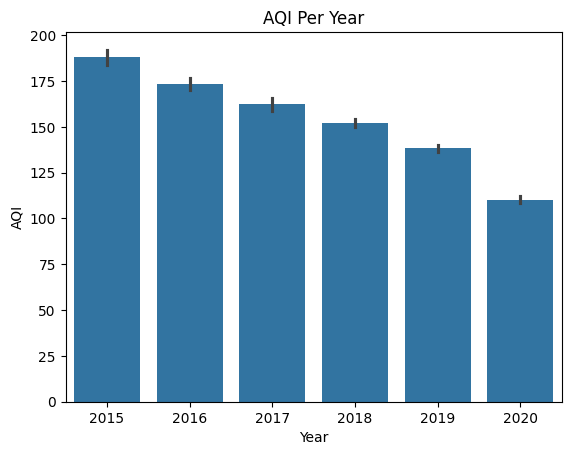

In [25]:
plt.title("AQI Per Year")
sns.barplot(x=df_full['Year'],y=df_full['AQI'],data=df_full)


Monthly Avg of each Pollutant 

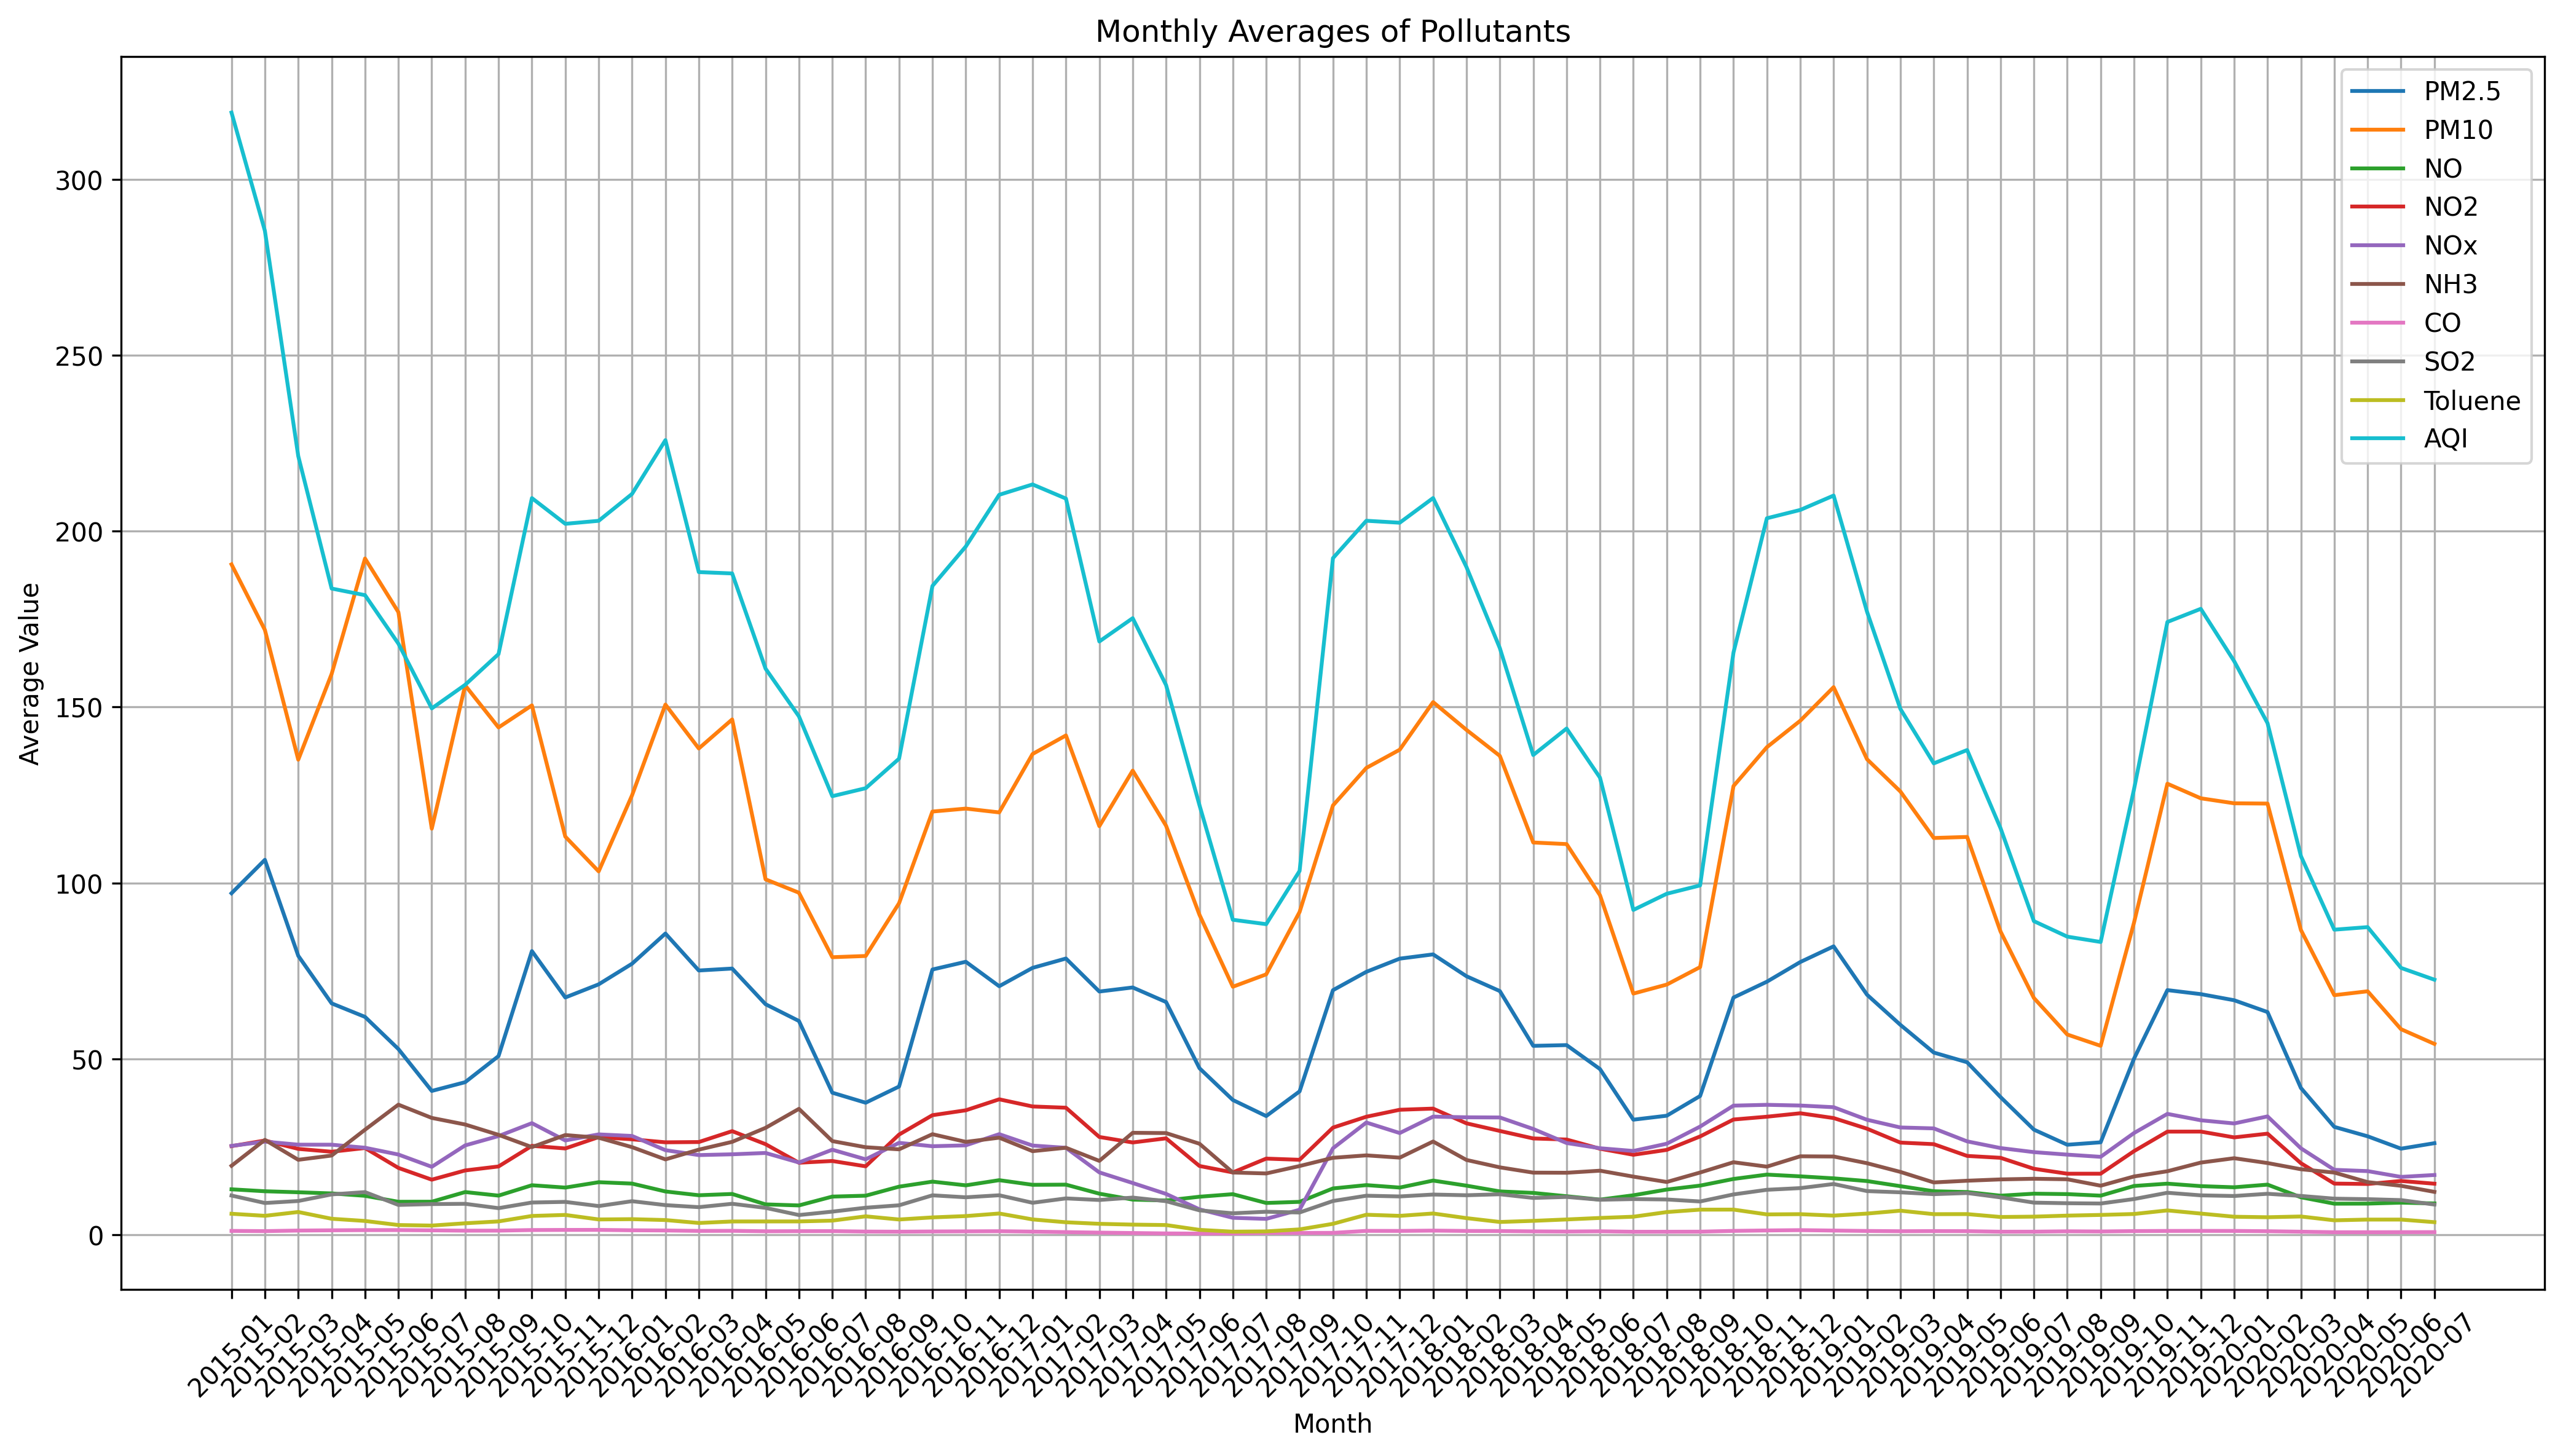

In [26]:
numeric_cal = df.select_dtypes(include = 'number').columns.tolist()
df['Month'] = df['Date'].dt.to_period('M')
monthly_data = df.groupby('Month')[numeric_cal].mean(numeric_only = True)

plt.figure(figsize=(14, 8), dpi=300)
for col in numeric_cal:
    plt.plot(monthly_data.index.astype(str), monthly_data[col], label=col)

plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Averages of Pollutants')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Annual and Monthly avg of AQI Value

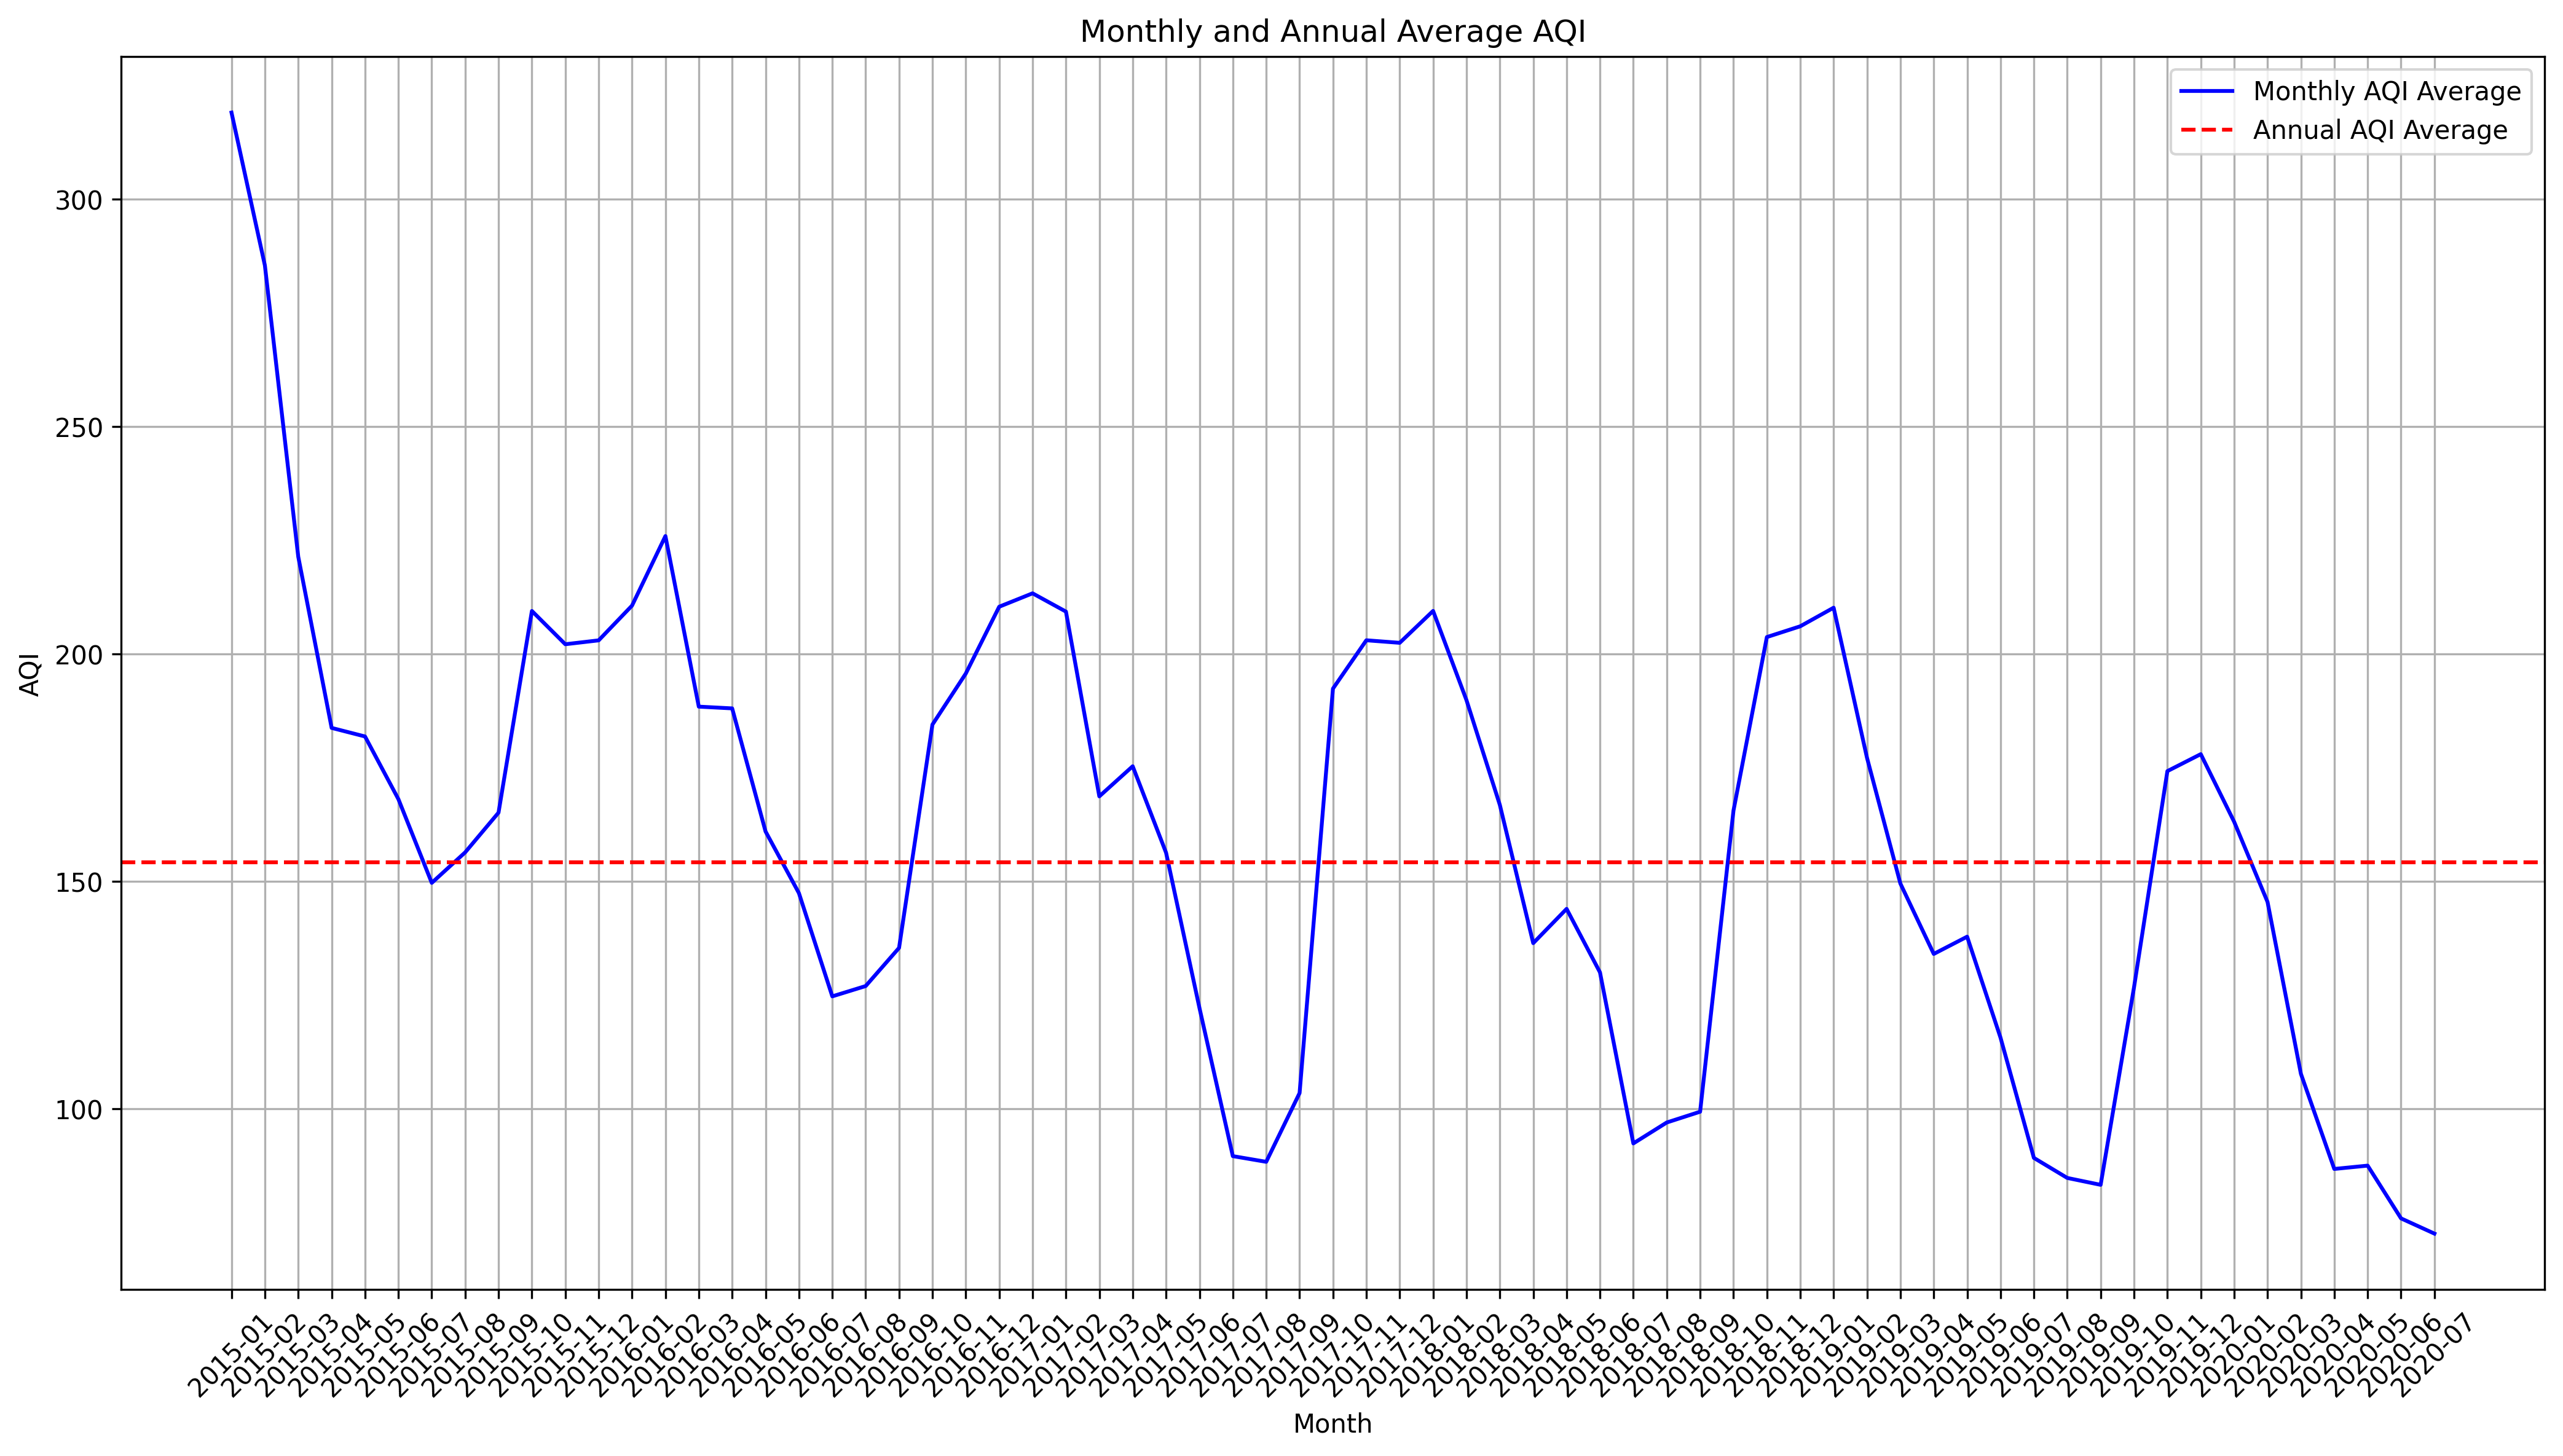

In [27]:
df['Month'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.year

monthly_aqi = df.groupby('Month')['AQI'].mean()

annual_aqi_mean = df.groupby('Year')['AQI'].mean()

plt.figure(figsize=(14, 8), dpi=300)

plt.plot(monthly_aqi.index.astype(str), monthly_aqi, label='Monthly AQI Average', color='blue')

plt.axhline(y=annual_aqi_mean.mean(), color='red', linestyle='--', label='Annual AQI Average')

plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly and Annual Average AQI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PREPARING THE DATA

In [28]:
df_full=df_full.drop(columns='City')


In [29]:
df_full.head(2)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
10229,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,2015
10230,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,2015


In [30]:
df_full.isnull().sum()

Date          0
PM2.5       678
PM10       7086
NO          387
NO2         391
NOx        1857
NH3        6536
CO          445
SO2         605
Toluene    5826
AQI           0
Year          0
dtype: int64

Using SimpleImputer For Filling the Missing Values in indepentent variables 

In [31]:
# Importing required libraries
import pandas as pd
from sklearn.impute import SimpleImputer

numerical_cols = df_full.select_dtypes(include='number').columns

# Create SimpleImputer object with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on numerical columns and transform the data
df_full[numerical_cols] = imputer.fit_transform(df_full[numerical_cols])

# Display the first few rows of the updated DataFrame
print(df_full.head())
 

            Date   PM2.5     PM10     NO    NO2      NOx    NH3    CO   SO2  \
10229 2015-01-01   80.59  149.745  19.95  36.39  40.1275  33.85  1.45  9.25   
10230 2015-01-02   80.59  269.550  19.95  32.87  40.1275  31.83  1.45  6.65   
10231 2015-01-03   87.18  131.900  25.73  30.31  47.9500  30.02  1.45  2.65   
10232 2015-01-04  151.84  241.840  25.01  36.91  48.6200  30.02  1.45  4.63   
10233 2015-01-05  146.60  219.130  14.01  34.92  38.2500  30.02  1.45  3.33   

       Toluene    AQI    Year  
10229     9.15  208.0  2015.0  
10230    20.09  208.0  2015.0  
10231    10.23  143.0  2015.0  
10232     9.71  319.0  2015.0  
10233     6.21  325.0  2015.0  


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_full[numerical_cols])

In [33]:
df_full.isna().sum()

Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
Toluene    0
AQI        0
Year       0
dtype: int64

In [34]:
df_full.head(2)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
10229,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,2015.0
10230,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,2015.0


In [35]:
cityname = pd.read_csv("newdataset.csv",usecols=['City'])

df_full['City'] = cityname
df_full.head(2)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year,City
10229,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,2015.0,Delhi
10230,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,2015.0,Delhi


Using Cat codes category col for City Column convert string to number 

In [36]:
df_full['City'] = df_full['City'].astype('category')
df_full['City'] = df_full['City'].cat.codes

In [37]:
X= df_full[['PM2.5',
  'PM10',
  'NO',
  'NO2',
  'NOx',
  'NH3',
  'CO',
  'SO2',
  'Toluene',
  'Year',
  'City']]

X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Year,City
10229,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.150000,2015.0,10
10230,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.090000,2015.0,10
10231,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.230000,2015.0,10
10232,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.710000,2015.0,10
10233,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.210000,2015.0,10
...,...,...,...,...,...,...,...,...,...,...,...
3072,22.00,34.000,1.50,9.68,6.4000,8.45,0.59,10.88,0.500000,2020.0,2
26956,24.85,31.060,27.73,29.36,57.0900,1.37,1.52,14.42,5.202849,2020.0,23
28068,2.00,35.000,1.68,2.30,2.5800,5.62,0.42,6.15,5.202849,2020.0,24
7833,32.90,72.380,0.56,9.87,5.9200,36.63,0.33,14.91,0.330000,2020.0,7


In [38]:
y=df_full[['AQI']]
y

,AQI
10229,208.0
10230,208.0
10231,143.0
10232,319.0
10233,325.0
...,...
3072,54.0
26956,101.0
28068,41.0
7833,66.0


Split the Train and Test Data 

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)


In [40]:
X_train.shape

(19880, 11)

In [41]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

Linear Regression 

In [42]:
linear.fit(X_train,y_train)

LinearRegression()

In [43]:
m=linear.intercept_
m

array([9742.16596103])

In [44]:
b = linear.coef_
b

array([[ 1.55305131,  0.16985317,  0.24716571,  0.11443388,  0.20707354,
         0.16784849, 26.99273853,  0.87869233,  0.66446591, -4.83192118,
        -0.16932185]])

In [45]:
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

In [46]:
from  sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_scoreLintest=r2_score(y_test,y_test_pred)
mean_absolute_errorLintest=mean_absolute_error(y_test,y_test_pred)
mean_squared_errorLintest=mean_squared_error(y_test,y_test_pred)
print("r2_score : ",r2_scoreLintest)
print("Mean Absolute Error : ",mean_absolute_errorLintest)
print("Mean Squared erroe  : ",mean_squared_errorLintest)

r2_score :  0.6667162293804629
Mean Absolute Error :  34.836481443272405
Mean Squared erroe  :  2559.1553722151507


In [47]:
from  sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_scoreLintrain=r2_score(y_train,y_train_pred)
mean_absolute_errorLintrain=mean_absolute_error(y_train,y_train_pred)
mean_squared_errorLintrain=mean_squared_error(y_train,y_train_pred)
print("r2_score : ",r2_scoreLintrain)
print("Mean Absolute Error : ",mean_absolute_errorLintrain)
print("Mean Squared erroe  : ",mean_squared_errorLintrain)

r2_score :  0.6729483425770448
Mean Absolute Error :  34.341581787137265
Mean Squared erroe  :  2496.380493241251


In [48]:
report ={"r2_score" : [r2_scoreLintest,r2_scoreLintrain],"MAE":[mean_absolute_errorLintest,mean_absolute_errorLintrain],"MSR":[mean_squared_errorLintest,mean_squared_errorLintrain]}
report = pd.DataFrame(report)
report.index=["Linear Regression test","Linear Regressio  Train"]
report

,r2_score,MAE,MSR
Linear Regression test,0.666716,34.836481,2559.155372
Linear Regressio Train,0.672948,34.341582,2496.380493


DecisionTree


In [49]:
from  sklearn.tree import DecisionTreeRegressor,plot_tree

In [50]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [51]:
y_train_preddic= tree.predict(X_train)
y_test_preddic= tree.predict(X_test)

In [52]:
from  sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_scoredictest=r2_score(y_test,y_test_preddic)
mean_absolute_errordictest=mean_absolute_error(y_test,y_test_preddic)
mean_squared_errordictest=mean_squared_error(y_test,y_test_preddic)

r2_scoredistrain=r2_score(y_train,y_train_preddic)
mean_absolute_errordistrain=mean_absolute_error(y_train,y_train_preddic)
mean_squared_errordistrain=mean_squared_error(y_train,y_train_preddic)


In [53]:
report ={"r2_score" : [r2_scoredictest,r2_scoredistrain],"MAE":[mean_absolute_errordictest,mean_absolute_errordistrain],"MSR":[mean_squared_errordictest,mean_squared_errordistrain]}
report = pd.DataFrame(report)
report.index=["dicision Regression test","dicision Regression Train"]
report

,r2_score,MAE,MSR
dicision Regression test,0.728249,32.886222,2086.666863
dicision Regression Train,0.742439,32.039374,1965.959514


[Text(0.5, 0.875, 'x[0] <= 80.585\nsquared_error = 7632.985\nsamples = 19880\nvalue = 146.744'),
 Text(0.25, 0.625, 'x[1] <= 87.36\nsquared_error = 2806.109\nsamples = 15017\nvalue = 109.211'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[6] <= 1.445\nsquared_error = 919.283\nsamples = 6351\nvalue = 75.821'),
 Text(0.0625, 0.125, 'squared_error = 598.993\nsamples = 5681\nvalue = 71.267'),
 Text(0.1875, 0.125, 'squared_error = 1968.183\nsamples = 670\nvalue = 114.434'),
 Text(0.375, 0.375, 'x[10] <= 0.5\nsquared_error = 2773.017\nsamples = 8666\nvalue = 133.681'),
 Text(0.3125, 0.125, 'squared_error = 4026.077\nsamples = 645\nvalue = 224.217'),
 Text(0.4375, 0.125, 'squared_error = 1960.118\nsamples = 8021\nvalue = 126.401'),
 Text(0.75, 0.625, 'x[0] <= 80.595\nsquared_error = 4754.763\nsamples = 4863\nvalue = 262.647'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[10] <= 5.0\nsquared_error = 5513.876\nsamples = 1553\nvalue = 299.682'),
 Text(0.5625, 0.125, 'squared_err

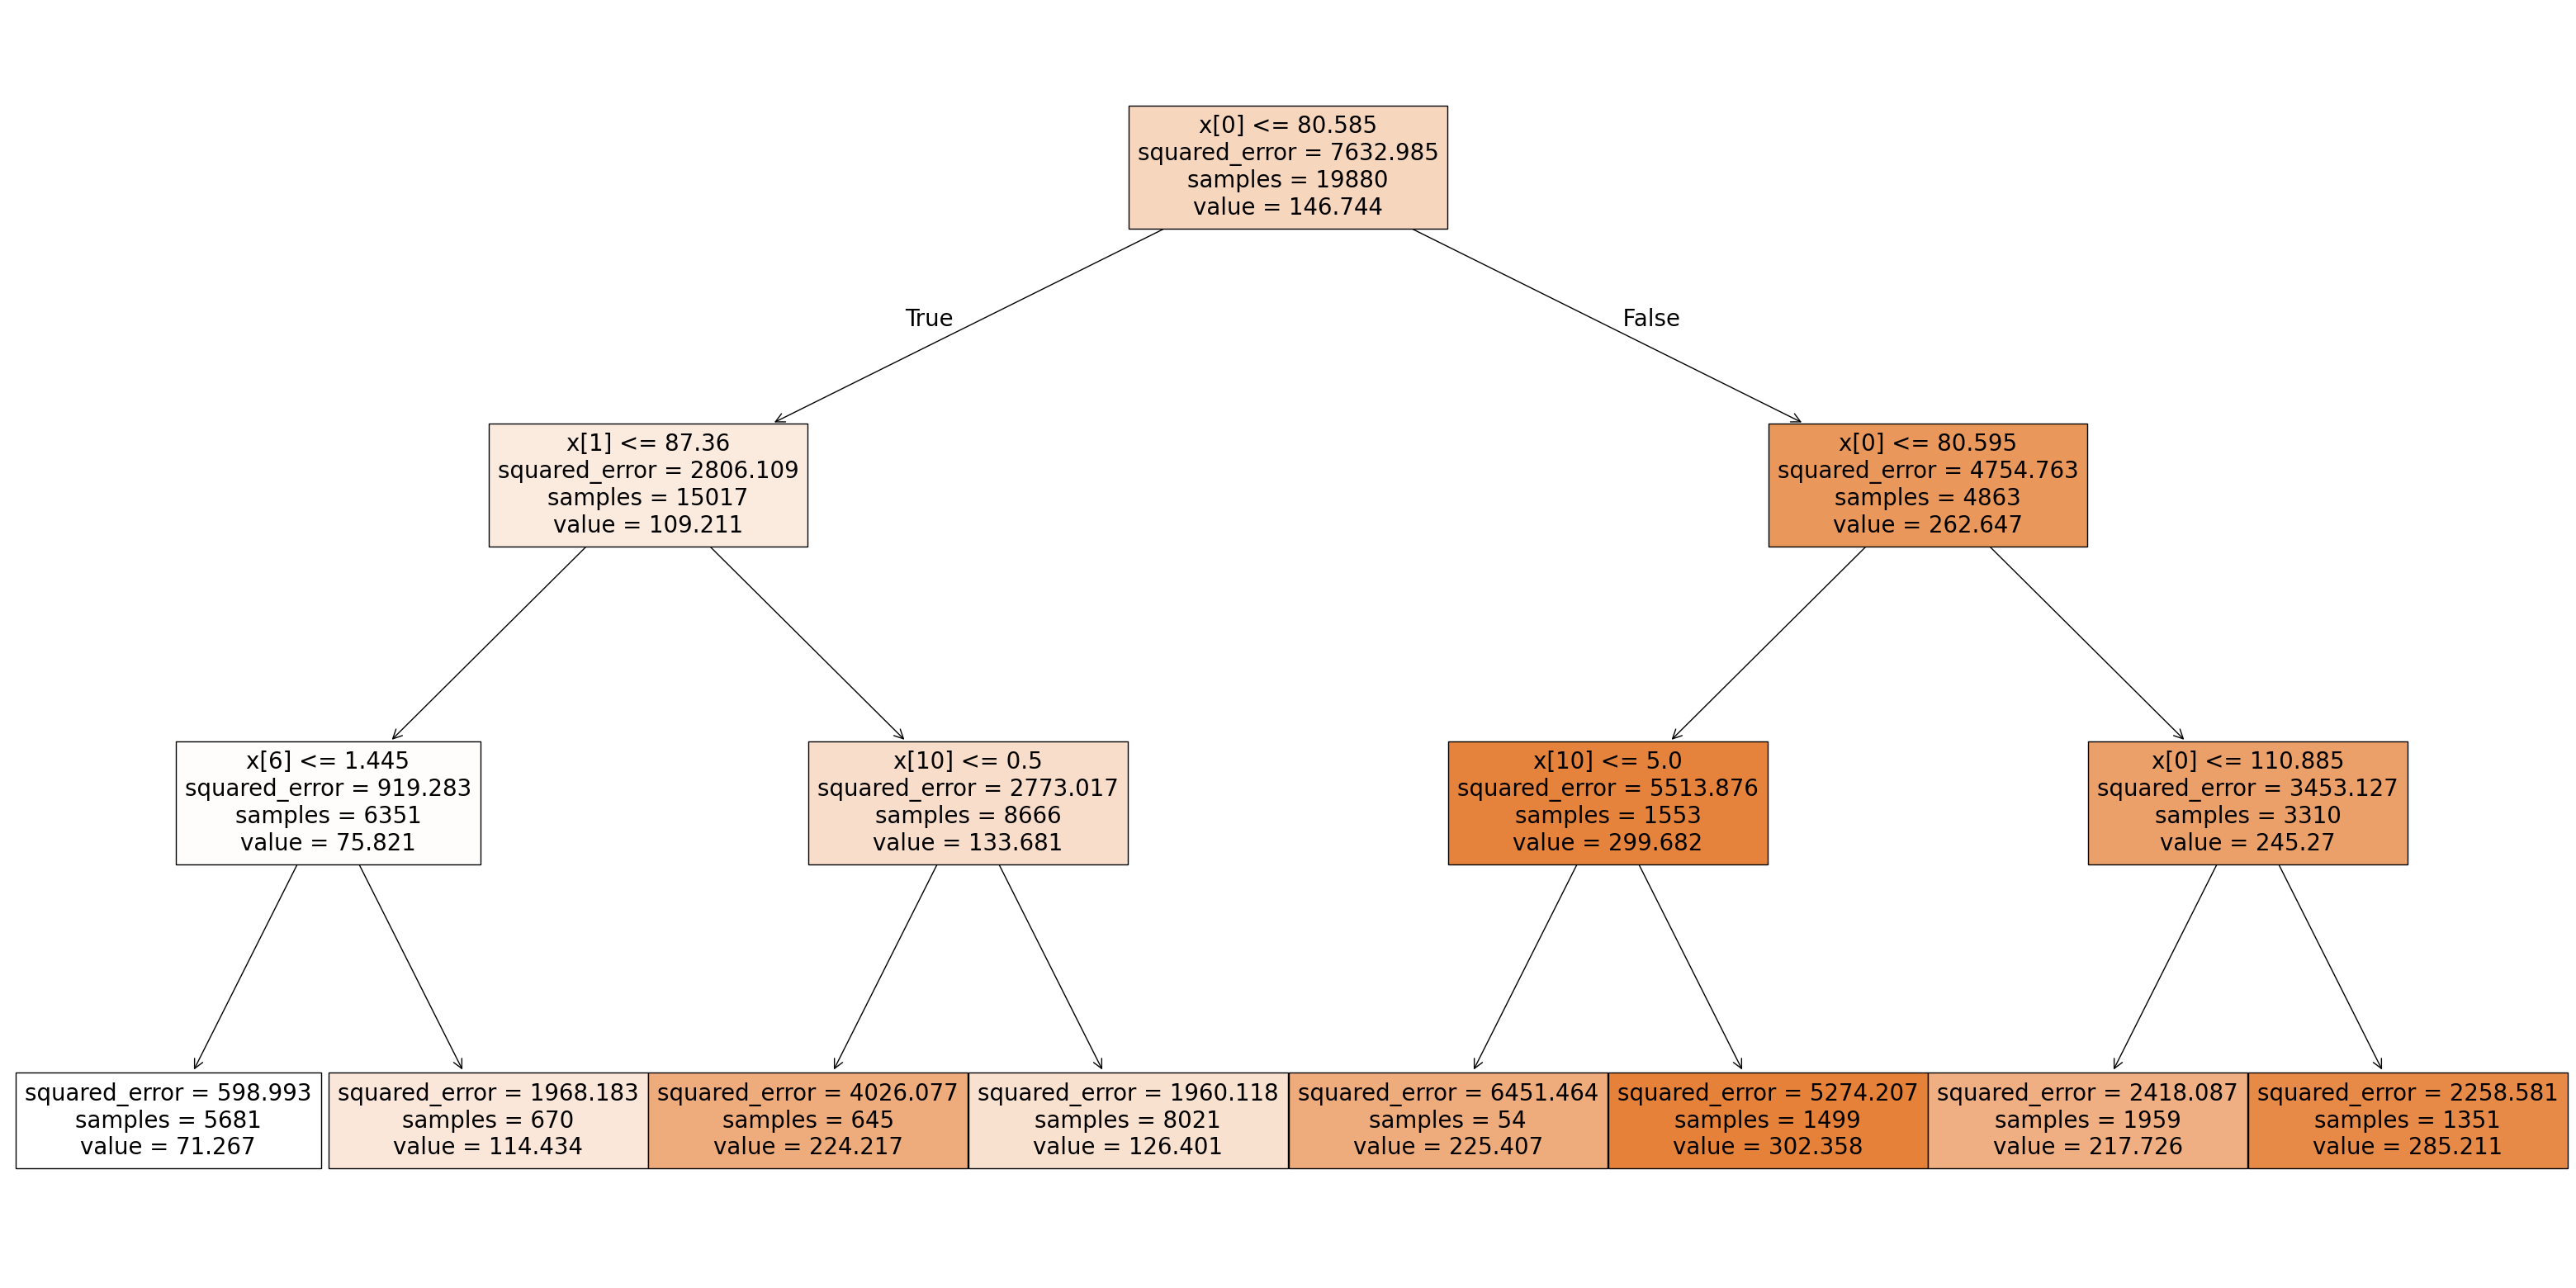

In [54]:
plt.figure(figsize=(40, 20))
# The max_depth=3 parameter specifies 3 depth levels, filled=True makes the tree nodes colored
plot_tree(tree, max_depth=3, filled=True)

RandomForest 

In [55]:
from sklearn.ensemble import RandomForestRegressor

ran = RandomForestRegressor(n_estimators=75,max_depth=7,random_state=34)


In [56]:
ran.fit(X_train,y_train)

c:\Users\gtmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=7, n_estimators=75, random_state=34)

In [57]:
y_train_predRan = ran.predict(X_train)
y_test_predRan = ran.predict(X_test)

In [59]:
from  sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_scoreRantest=r2_score(y_test,y_test_predRan)
mean_absolute_errorRantest=mean_absolute_error(y_test,y_test_predRan)
mean_squared_errorRantest=mean_squared_error(y_test,y_test_predRan)


r2_scoreRantrain=r2_score(y_train,y_train_predRan)
mean_absolute_errorRantrain=mean_absolute_error(y_train,y_train_predRan)
mean_squared_errorRantrain=mean_squared_error(y_train,y_train_predRan)


In [60]:
report ={"r2_score" : [r2_scoreRantest,r2_scoreRantrain],"MAE":[mean_absolute_errorRantest,mean_absolute_errorRantrain],"MSR":[mean_squared_errorRantest,mean_squared_errorRantrain]}
report = pd.DataFrame(report)
report.index=["RandomForest Regression test","RandomForest Regression Train"]
report

,r2_score,MAE,MSR
RandomForest Regression test,0.834449,23.930883,1271.204064
RandomForest Regression Train,0.854539,22.584240,1110.300705


Finding Best Model 


In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [62]:
results = []
#we created a dict where we create objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
}

In [63]:
def try_model(model,name):
    model.fit(X_train,y_train)
    y_train_pre1= model.predict(X_train)
    y_test_preds1=model.predict(X_test)
    
    # The R^2 score indicates how well the model predicted. A value close to 1 indicates that the model predicted perfectly.
    train_r2_score = r2_score(y_train,y_train_pre1) 
    test_r2_score = r2_score(y_test, y_test_preds1)

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)
    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    # We add the name of each model and the scores of that model to the result list.
    results.append({'Model': name, 'Train R2 Score': train_r2_score,'Test R2 Score': test_r2_score}) 

In [64]:
for name, model in models.items():
    try_model(model,name)

LinearRegression Model:
Train r2_score :  0.6729483425770448
Test r2_score :  0.6667162293804629
----------------------------------------
Ridge Model:
Train r2_score :  0.6729483416806639
Test r2_score :  0.6667155380487114
----------------------------------------
SGDRegressor Model:
Train r2_score :  -4.889401850204971e+25
Test r2_score :  -4.839148758544206e+25
----------------------------------------
ElasticNet Model:
Train r2_score :  0.6611526858485315
Test r2_score :  0.6528782961466588
----------------------------------------
Lasso Model:
Train r2_score :  0.6724568954371103
Test r2_score :  0.6657360129358201
----------------------------------------


c:\Users\gtmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
GBR = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0] 
}

In [66]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,  
    cv=5,       
    verbose=1, 
    n_jobs=-1, 
    random_state=42
)

randomized_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\gtmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [67]:
print("Best Hyperparameters :", randomized_search.best_params_)
print("Best Score :", randomized_search.best_score_)

Best Hyperparameters : {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}
Best Score : 0.8517184674745165


In [68]:
best_model = randomized_search.best_estimator_
best_model.fit(X_train,y_train) 
train_preds = best_model.predict(X_train)
test_preds=best_model.predict(X_test)

train_r2_score = r2_score(y_train, train_preds) 
test_r2_score = r2_score(y_test, test_preds) 

print("Train r2_score : ", train_r2_score)
print("Test r2_score : ", test_r2_score)

c:\Users\gtmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Train r2_score :  0.9312826157096541
Test r2_score :  0.8501952987490892


In [70]:

#X=df_full[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','Toluene','City']]
best_model.predict([[2018,23.3,33.2,10.2,4.2,10.4,52.0,13.0,20.0,89.0,10]])



c:\Users\gtmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([208.35291815])

To create a Pkl file for Creating GUI For User Want to predict 


In [244]:
import joblib 

joblib.dump(best_model,'finial_prediction.pkl')
joblib.dump(scaler,'scaler1.pkl')


['scaler1.pkl']